## Знакомство с библиотеками для анализа данных. Pandas

Результат лабораторной работы − отчет в формате ноутбука Jupyter (ipynb-файл). Постарайтесь сделать ваш отчет интересным рассказом, последовательно отвечающим на вопросы из заданий. Помимо ответов на вопросы, в отчете так же должен быть код, однако чем меньше кода, тем лучше всем: нам − меньше проверять, вам —  проще найти ошибку или дополнить эксперимент. При проверке оценивается четкость ответов на вопросы, аккуратность отчета и кода.

### О задании

Лабораторные работы "NumPy" и "Pandas" направлены на работу с пакетами NumPy, Pandas и Matplotlib путём решения набора задач (да, алгебры и геометрии тут почти нет). В данных заданиях разрешено пользоваться только стандартной библиотекой языка Python, а также пакетами NumPy, Pandas и Matplotlib. Целью заданий является редактирование данного jupyter notebook-a (в части блоков с кодом на python) таким образом, чтобы были реализованы указанные в заданиях функции.


### Оценивание и штрафы

* Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи)
* «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов
* Если вы нашли решение какого-то из заданий в открытом источнике, необходимо добавить ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник)
* Не оцениваются задания с удалёнными формулировками
* Не оценивается лабораторная работа целиком, если она была выложена в открытый источник

###  Правила сдачи

Работу необходимо сдавать, загрузив в свой приватный репозиторий и сообщив об этом в телеграм @xrzvs (или просто открыв доступ к ноутбуку в Google Colab; более подробную информацию смотрите в README.md). 

### Аналитика данных с [Pandas](https://pandas.pydata.org/) 

Загрузите таблицу с данными из [```articles.csv```](https://disk.yandex.ru/i/m4rxX9t3MGMrnQ). Удалите записи, в которых присутствуют пропуски.

In [10]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

___

In [11]:
tab = pd.read_csv('articles.xls', index_col='id')

In [12]:
tab.head()

,title,publication,author,date,year,month,content
id,,,,,,,
17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016,12,WASHINGTON — Congressional Republicans have...
17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017,6,"After the bullet shells get counted, the blood..."
17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017,1,"When Walt Disney’s “Bambi” opened in 1942, cri..."
17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017,4,"Death may be the great equalizer, but it isn’t..."
17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017,1,"SEOUL, South Korea — North Korea’s leader, ..."


___

**(0.5 балла) Задача 1.** Проделайте следующие базовые операции с датафреймами:

1. определите количество различных издательств в таблице;
2. найдите количество опубликованных статей в отрезке [2016-06-01, 2016-12-31];
3. посчитайте распределение статей автора *Tom Ciccotta* по годам;
4. найдите месяц, в котором было наибольшее число статей;
5. выпишите 3 первые статьи автора *John Hayward* в 2016 году.

### Количество различных издательств

In [13]:
len(tab.publication.unique())

5

___

### Количество статей в отрезке [2016-06-01, 2016-12-31]

In [14]:
tab.date = pd.to_datetime(tab.date)

In [15]:
tab.date[tab.date >= pd.Timestamp('2016-06-01')][tab.date <= pd.Timestamp('2016-12-31')].shape[0]

19408

___

### Посчитайте распределение статей автора Tom Ciccotta по годам;

In [16]:
tab[tab.author == 'Tom Ciccotta'].head()

,title,publication,author,date,year,month,content
id,,,,,,,
26557,"MILO Fan at UW Appears Covered in Bruises, Cut...",Breitbart,Tom Ciccotta,2017-01-20,2017,1,A young man in an American flag hat who attend...
26589,WATCH: MILO and Martin Shkreli March on UC Dav...,Breitbart,Tom Ciccotta,2017-01-14,2017,1,Breitbart editor MILO and former pharmaceutica...
26619,Van Jones at University of Chicago: Safe Space...,Breitbart,Tom Ciccotta,2017-02-25,2017,2,Speaking at the University of Chicago Institut...
26671,"University of Colorado Regent Defends MILO, Wa...",Breitbart,Tom Ciccotta,2017-01-19,2017,1,"The new regent at the University of Colorado, ..."
26691,Georgetown Asks Students to Stop Offering Dorm...,Breitbart,Tom Ciccotta,2017-01-17,2017,1,Administrators at Georgetown University releas...


In [17]:
tab[tab.author == 'Tom Ciccotta'].year.unique()

array([2017, 2016])

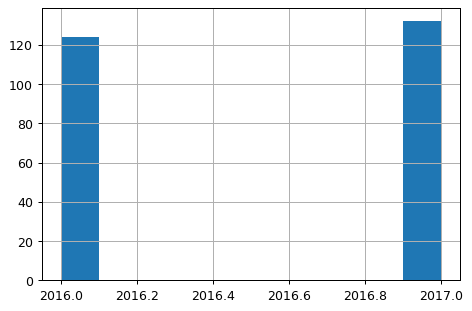

In [18]:
fig,ax = plt.subplots(dpi=90)
tab[tab.author == 'Tom Ciccotta'].year.hist(ax=ax)
plt.show()

___

### Найдите месяц, в котором было наибольшее число статей

In [19]:
tab.groupby('month').count()['publication'].idxmax()
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.idxmax.html

1

___

### Выпишите 3 первые статьи автора John Hayward в 2016 году

In [20]:
tab[(tab.author == 'John Hayward') & (tab.year == 2016)].sort_values('date').head(3)

,title,publication,author,date,year,month,content
id,,,,,,,
35600,Indonesian Couple Beaten with Canes for Violat...,Breitbart,John Hayward,2016-01-01,2016,1,Islamic sharia law was enforced with canes onc...
40791,Islamic State Claims Credit For Gun Attack On ...,Breitbart,John Hayward,2016-01-01,2016,1,The Islamic State has claimed responsibility f...
46325,Protests Across India Against Saudi Execution ...,Breitbart,John Hayward,2016-01-04,2016,1,Protests over Saudi Arabia’s execution of Shii...


___

** Работа со строками в датафрейме. **

Для датафреймов существуют методы работы со строковыми данными. Чтобы применить их, необходимо воспользоваться атрибутом ```str```, после чего вызвать нужные методы работы со строками. Например, вызов:

```df['content'].str.len() ```

подсчитает для каждой строчки в датафрейме количество символов в колонке content. Более подробную информацию про работу с текстовыми данными в Pandas можно найти [здесь](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html).


**(0.5 балла) Задача 2.**

Найдите в датафрейме всех авторов, имя которых содержит Faith. Выведите Series, состоящий из всех таких уникальных имен.

In [21]:
tab.author = tab.author.fillna('UNKNOWN')

In [22]:
tab.author[tab.author.str.contains('Faith')].unique()

array([' Faith Haleh Robinson', 'Faith Karimi', 'Faith Haleh Robinson',
       'Faith Karimi,', 'Faith Karimi ', 'Faith Karimi, ',
       ' Faith Karimi', ' Faith Karimi '], dtype=object)

**(1 балл) Задача 3.**

Как можно заметить, в таблице существует множество различных написаний имени Faith Karimi. В основном эти написания различаются пунктуацией - лишние пробелы и запятые. Для правильного подсчета статистик для текстовых данных зачастую возникает необходимость в их предобработке.

Проведите следующие преобразования для колонок *author* и *content*:

1. приведение текста к нижнему регистру;

2. удаление всей пунктуации из текста;

3. удаление пробелов в начале и конце строки;

3. замена подряд идущих пробелов одним пробелом.

Например, строка ```"   It's 6 a.m. and I'm still doing this homework :((    "```

преобразуется в строку  ```its 6 am and im still doing this homework```

Подсчитайте статистику для имени Faith из прошлого задания. Проверьте, что теперь различные способы написания «схлопываются» в один.

In [23]:
# https://stackoverflow.com/questions/38277928/remove-special-characters-in-pandas-dataframe
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.replace.html

In [24]:
tab.author = tab.author.str.lower().str.strip().str.replace(r'[^a-z\ ]', regex=True, repl=r'').str.replace('  ', repl=r'')
tab.content = tab.content.str.lower().str.strip().str.replace(r'[^a-z\ ]', regex=True, repl=r'').str.replace('  ', repl=r'')

In [25]:
tab.head(3)

,title,publication,author,date,year,month,content
id,,,,,,,
17283,House Republicans Fret About Winning Their Hea...,New York Times,carl hulse,2016-12-31,2016,12,washington congressional republicans have a ne...
17284,Rift Between Officers and Residents as Killing...,New York Times,benjamin mueller and al baker,2017-06-19,2017,6,after the bullet shells get counted the blood ...
17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,margalit fox,2017-01-06,2017,1,when walt disneys bambi opened incritics prais...


**Группировка данных**

С помощью метода [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) удобно группировать данные по значениям одной или нескольких колонок. Далее можно вычислять различные статистики для каждой группы по отдельности.

**(1 балл) Задача 4.**

Выведите для каждого автора максимальное количество публикаций за календарный год (колонка year), а также сам год, на котором достигается этот максимум. Выведите топ-20 строк в порядке убывания количества публикаций.

Пример:

Василий Пупкин написал 3 статьи в 2016, и 4 в 2017, а его брат Иван Пупкин только 1 статью в 2016, а в 2017 он отправился в армию и статей не писал.

Необходимо вывести

```
Василий Пупкин - 2017 - 4
Иван Пупкин    - 2016 - 1
```

Обратите внимание, что несколько вызовов методов над датафреймами можно объединить в один pipeline. Другими словами, можно писать

```
df.func1().func2().funс3()
```

По возможности реализуйте требуемую функцию с помощью **одного** такого пайплайна. Делайте переносы для лучшей читаемости кода.

In [26]:
tab.groupby(['author', 'year']).count().publication.unstack().assign(max_pub_cnt=lambda e: e.max(axis=1)).sort_values('max_pub_cnt',ascending=False).assign(max_year=lambda e: e.idxmax(axis=1))[['max_year', 'max_pub_cnt']]

year,max_year,max_pub_cnt
author,,
unknown,2016,2862.0
breitbart news,2016,1317.0
pam key,2016,820.0
charlie spiering,2016,660.0
alex swoyer,2016,584.0
...,...,...
jerry garrett,2016,1.0
jess bidgood alan blinder and jonathan m katz,2016,1.0
jess bidgood and alan blinder,2016,1.0


**(1 балл) Задача 5.**
Для каждой статьи $i$ исходного датафрейма посчитайте количество статей, опубликованных тем же издательством (publication), к моменту публикации $i$ (включая статьи того же дня).

Обратите внимание, что для всех статей, выпущенных одним издательством в один день, должен получиться одинаковый ответ.

*Hint*. Возможный вариант решения:

1. сгруппировав данные по полям *publication*, *date*, посчитать размер каждой группы;
2. приджойнить размер группы к основному датафрейму с помощью функуии ```pd.merge```.

In [27]:
pub_date_cnt = tab.groupby(['publication', 'date'], as_index=False).count()[['publication', 'date', 'title']]

In [28]:
pd.merge(tab, pub_date_cnt, on=['publication', 'date']).rename({'title_y': 'same_day_publications'}, axis=1)

,title_x,publication,author,date,year,month,content,same_day_publications
0,House Republicans Fret About Winning Their Hea...,New York Times,carl hulse,2016-12-31,2016,12,washington congressional republicans have a ne...,4
1,"First, a Mixtape. Then a Romance. - The New Yo...",New York Times,katherine rosman,2016-12-31,2016,12,just how is hillary kerr thefounder of a digit...,4
2,Calling on Angels While Enduring the Trials of...,New York Times,andy newman,2016-12-31,2016,12,angels are everywhere in the muiz familys apar...,4
3,"Pan Pan, Father to a Generation of Pandas, Die...",New York Times,erin mccann,2016-12-31,2016,12,pan pan a giant panda whose virility helped sp...,4
4,Rift Between Officers and Residents as Killing...,New York Times,benjamin mueller and al baker,2017-06-19,2017,6,after the bullet shells get counted the blood ...,6
...,...,...,...,...,...,...,...,...
49995,The Enduring Mystery of Pain Measurement,Atlantic,john walsh,2017-01-10,2017,1,one night in may my wife sat up in bed and sai...,19
49996,What Conan O’Brien Means to Late Night’s Future,Atlantic,david sims,2017-01-10,2017,1,conan obrien was once the upstart of the comed...,19
49997,The Absurdity of Attacking Celebrities to Defe...,Atlantic,conor friedersdorf,2017-01-10,2017,1,fifty years ago california republicans elected...,19
49998,Drive-Through Redwoods Are Monuments to Violen...,Atlantic,sarah zhang,2017-01-10,2017,1,this weekend amidst a torrent of rain one of c...,19


*P.S* Ответ в `same_day_publications`

In [29]:
# solution: https://stackoverflow.com/questions/24980437/pandas-groupby-and-then-merge-on-original-table

### [Разреженные матрицы](https://ru.wikipedia.org/wiki/Разреженная_матрица)



Вот здесь http://docs.scipy.org/doc/scipy/reference/sparse.html можно посмотреть, как различные форматы разреженных матриц реализованы в библиотеке `scipy`.

Вот здесь https://www.cise.ufl.edu/research/sparse/matrices/index.html выложено много разреженных матриц из разнообразных приложений. Что особенно приятно, сайт предоставляет удобный клиент для скачивания, в котором доступен предпросмотр и данные о том, являются ли матрицы симметричными или положительно определёнными.

Торговая сеть предоставила вам данные о покупках своих клиентов, представляющие собою 
таблицу со столбцами 
* Номер записи
* *InvoiceNo* - номер чека
* *StockCode* - код товара
* *Description* - название товара

Чтобы понять, какие товары покупают вместе, вы решили построить (разреженную) матрицу, строки и столбцы которой соответствуют различным товарам, а в клетке с "номером" $(g_1, g_2)$ стоит число $c(g_1 \& g_2)$ --- количество чеков, содержащих оба товара. 

**(1 балл) Задача 6.** Ниже приведён код, который вам нужно дополнить, дописав функцию ``CreateMatrix``, создающую из структуры pandas.DataFrame разреженную матрицу. Ваша реализация должна удовлетворять следующим свойствам:
* матрица должна создаваться эффективно и по возможности с минимальным числом циклов;
* итоговая матрица должна позволять быстро отвечать на следующие вопросы:
  - сколько всего было куплено товаров данного типа?
  - какие пары товаров покупались вместе чаще всего?
  - какие товары чаще всего покупались вместе с данным товаром?

Пожалуйста, объясните, почему вы выбрали именно ту, а не иную архитектуру.

Загрузим данные:

In [30]:
import pandas as pd
receipts = pd.read_csv('Online Retail Short.csv', sep=';')

Распечатаем первые несколько строк, чтобы осознать структуру данных:

In [31]:
receipts = receipts.rename({'Unnamed: 0': 'id'}, axis=1).set_index('id')

In [32]:
receipts.head(5)

,InvoiceNo,StockCode,Description
id,,,
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER
1,536365,71053,WHITE METAL LANTERN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.


А теперь та самая функция. Вам могут пригодиться следующие конструкции:

* ``for name, group in data.groupby('InvoiceNo')`` --- цикл, в котором ``name`` будут различными значениями ``InvoiceNo``, а ``group`` --- кусками нашего ``DataFrame`` с заданным значением ``InvoiceNo``.
* ``for g1, g2 in itertools.combinations(list(group['StockCode']), 2)`` --- цикл, пробегающий пары различных элементов (сочетания по 2) из списка товаров из заданной группы.

In [33]:
import scipy.sparse as sps
import itertools

# Зачем бы нужны следующие две строки?)
idx2code = sorted(set(receipts['StockCode']))
code2idx = {code : i for i, code in enumerate(idx2code)}

def CreateMatrix(data):
    '''
    Ввод
    -----
    receipts: структура pandas.DataFrame
    
    Вывод
    ------
    res: разреженная матрица
    '''
    matr = sps.lil_matrix((len(idx2code), len(idx2code)))
    # Your code here
    for name, group in receipts.groupby('InvoiceNo'):
#         print(name, group)
        for g1, g2 in itertools.combinations(list(group['StockCode']), 2):
#             print(g1,g2)
            matr[code2idx[g1], code2idx[g2]] += 1
            matr[code2idx[g2], code2idx[g1]] += 1
    return matr

In [34]:
m = CreateMatrix(receipts)

**(1 балл) Задача 7.** C помощью созданной вами матрицы ответьте на несколько вопросов:

1) Какая пара товаров была куплена вместе наибольшее число раз? Пожалуйста, в качестве ответа укажите не `id`, а названия из столбца ``Descriptions``.

2) Что чаще всего покупали вместе с ``KNITTED UNION FLAG HOT WATER BOTTLE``?

В вашем ноутбуке должно быть продемонстрировано, как вы это находите с помощью матрицы!

In [35]:
arr = m.toarray()

1) Какая пара товаров была куплена вместе наибольшее число раз? Пожалуйста, в качестве ответа укажите не `id`, а названия из столбца ``Descriptions``.

In [36]:
a_idx, b_idx = np.unravel_index(arr.argmax(), np.array(arr).shape)

In [37]:
print("Answer:",receipts[receipts.StockCode == idx2code[a_idx]].Description.unique()[0], "and", receipts[receipts.StockCode == idx2code[b_idx]].Description.unique()[0])

Answer: GREEN REGENCY TEACUP AND SAUCER and ROSES REGENCY TEACUP AND SAUCER 


2) Что чаще всего покупали вместе с ``KNITTED UNION FLAG HOT WATER BOTTLE``?

In [38]:
code = receipts[receipts.Description == 'KNITTED UNION FLAG HOT WATER BOTTLE'].StockCode.unique()[0]

In [39]:
frequent_idx = arr[code2idx[code]].argmax()

In [40]:
print("Answer:",receipts[receipts.StockCode == idx2code[frequent_idx]].Description.unique()[0])

Answer: CHOCOLATE HOT WATER BOTTLE


### Визуализация ([Matplotlib](https://matplotlib.org/stable/index.html))

Обратите внимание, что у графиков должны быть подписаны оси, заголовок графика и при необходимости обязательно наличие легенды. За отсутствие названий графиков и подписей к осям могут снижаться баллы. Все картинки должны быть самодостаточны и визуально удобны для восприятия, так чтобы не нужно было смотреть ваш код или знать задание, чтобы понять что на них изображено.

![](https://imgs.xkcd.com/comics/convincing.png)

In [41]:
# Графическая библиотека
import matplotlib.pyplot as plt

# Позволяет отрисовывать графики и изображения прямо в ноутбуке, а не в отдельном окне. Жизненно важная вещь!
%matplotlib inline

**(0.5 балла) Задача 8.** Используя функцию ```gen_uncertain_data``` для генерации выборки, отобразите на графике синим цветом функцию ```y(x)```, а также ее доверительный интервал в виде закрашенной зеленым цветом области от ```y[i] - error[i]``` до ```y[i] + error[i]```. Полезной может оказаться функция fill_between.

    def gen_uncertain_data():
        x = np.linspace(0, 30, 100)
        y = np.sin(x/6*np.pi) + np.random.normal(0, 0.02, size=x.shape)
        error = np.random.normal(0.1, 0.02, size=y.shape)
        return x, y, error

In [42]:
def gen_uncertain_data():
    x = np.linspace(0, 30, 100)
    y = np.sin(x/6*np.pi) + np.random.normal(0, 0.02, size=x.shape)
    error = np.random.normal(0.1, 0.02, size=y.shape)
    return x, y, error

In [43]:
x,y,error = gen_uncertain_data()

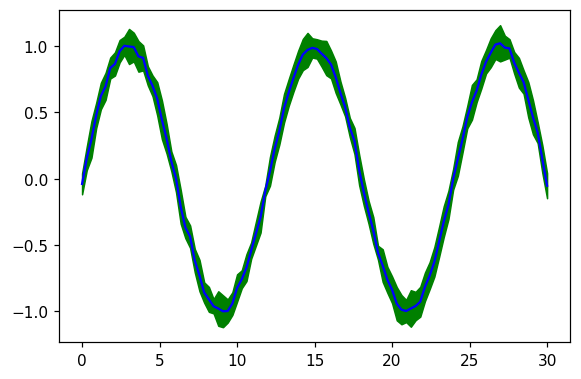

In [44]:
%matplotlib inline
fig = plt.figure(dpi=110)
ax = fig.add_subplot()
ax.fill_between(x,y-error,y+error, color='green')
ax.plot(x,y,color='blue')
plt.show()

**(0.5 балла) Задача 9.** Bизуализируйте соотношение различных издательств, используя [pie plot](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization-pie).


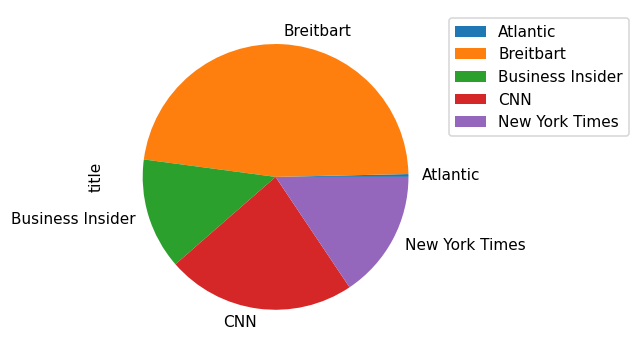

In [45]:
fig1 = plt.figure(dpi=110)
ax = tab.groupby('publication').title.count().plot.pie()
fig1.add_axes(ax)
ax.legend(bbox_to_anchor=(1,0,0,1))
plt.show()

**(0.5 балла) Задача 10.** Постройте распределение количества публикаций каждого издания по каждому году, используя [bar plot](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization-barplot). В какой год было больше всего публикаций?

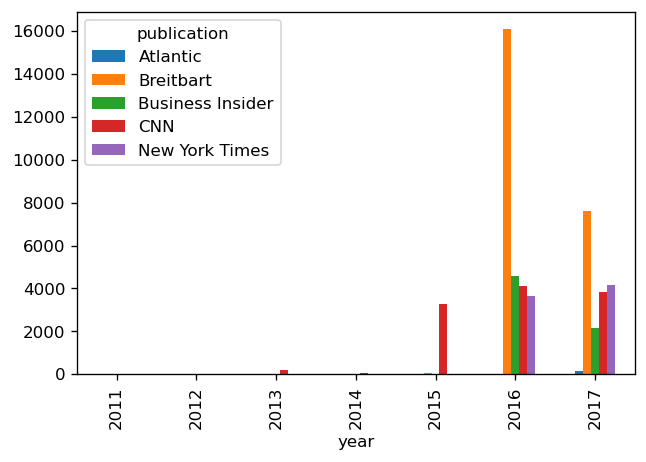

In [46]:
%matplotlib inline
fig, ax = plt.subplots(dpi=120)
tab.groupby(['year','publication']).count().title.unstack().plot.bar(ax=ax)
plt.show()

**(0.5 балла) Задача 11.** Изобразите распределение длин заголовков (*title*) статей для каждого издательства. Для этого можно воспользоваться, например, функцией [sns.violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html).

In [47]:
tab = tab.assign(title_length=lambda a: a.title.str.len())

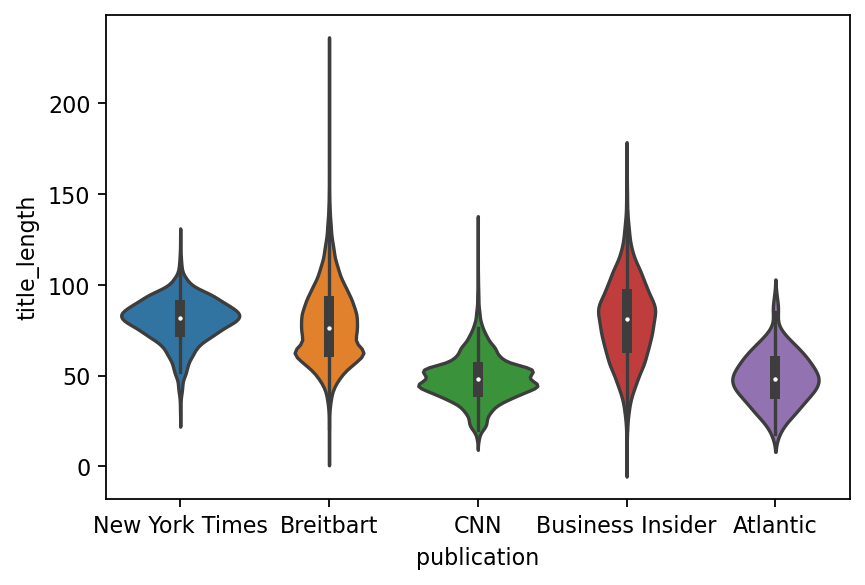

In [48]:
%matplotlib inline
fig, ax = plt.subplots(dpi=160)
sns.violinplot(x="publication", y="title_length", data=tab, ax=ax)
plt.show()